In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import altair as alt
import math
import pandas as pd
from datetime import datetime, timedelta
import pmdarima as pm
from urllib.error import URLError
from fbprophet import Prophet


In [2]:
df = pd.read_excel("C:/Users/User/Downloads/Sales & Qty Sold Daily Data.xlsx")
df

,BRANCH_CODE,Date - Year,Date - Month,Date - Day,Total Ret Sales,Qty Sold Retoff
0,ALM,2018,April,27,5690.47,4.0
1,ALM,2018,April,29,1333.33,2.0
2,ALM,2018,April,30,666.66,2.0
3,ALM,2018,May,1,809.52,1.0
4,ALM,2018,May,6,14952.39,6.0
...,...,...,...,...,...,...
10348,SOFITL,2018,December,24,3075.24,1.0
10349,SOFITL,2018,December,25,4207.62,2.0
10350,SOFITL,2018,December,27,95.24,1.0
10351,SOFITL,2018,December,29,5046.67,2.0


In [3]:
df1=df[["Date - Year","Date - Month","Date - Day","BRANCH_CODE","Total Ret Sales","Qty Sold Retoff"]]

In [4]:
df1["Total Ret Sales"]=df1["Qty Sold Retoff"].astype(float)
df1["Sales"]=df1["Total Ret Sales"]
df1['Date']=pd.to_datetime(df1['Date - Month']+df1['Date - Year'].astype(str)+df1['Date - Day'].astype(str),format='%B%Y%d')
#df1['Date']=pd.to_datetime(df1['Date - Month']+df1['Date - Year'].astype(str)+df1['Date - Year'].astype(str),format='%B%Y%d')


In [5]:
df2=df1[["Date","Sales"]]

In [6]:
df2["Date"]=pd.to_datetime(df2["Date"])

C:\Users\User\AppData\Local\Temp/ipykernel_3648/3346926765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date"]=pd.to_datetime(df2["Date"])


In [7]:
#df3=df2.resample('AS', on='VOCDATE')['Sales_value'].agg(['sum'])
df3=df1.groupby(pd.Grouper(key='Date',freq='7D')).sum().reset_index()

In [8]:
df3=df3.groupby("Date").sum()

<AxesSubplot:xlabel='Date'>

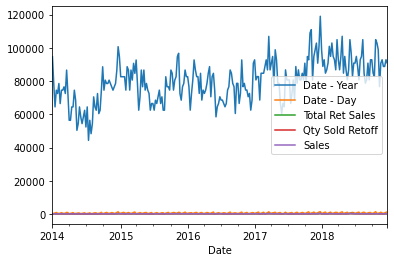

In [9]:
df3.plot()

In [10]:
#DF= df[df["BRANCH_CODE"].isin(["SJGS","MOE",'MCC','RETOFF','LMAD','BDJEW','ALM'])]


In [11]:
#filter_list = [ i for i in df["BRANCH_CODE"].unique()]

In [12]:
#design = [ i for i in df["DESIGN_CODE"].unique()]
#design

In [13]:
#df = df[df["BRANCH_CODE"]=="MOE"]
#df = df[df["DESIGN_CODE"]=="DIA TURK-M"]


In [14]:
df = df3#[["VOCDATE","Sales_quantity"]]
#df = df[df["BRANCH_CODE"]=="MCC"]
#df

In [15]:
#df3["Date"]= pd.to_datetime(df3['Date'], format='%Y-%m-%d')


In [24]:
df3=df3.reset_index()
df3=df3[["Date","Total Ret Sales"]]

In [25]:
daily_train_df=df3[:209]
daily_test_df=df3[209:]
df3

,Date,Total Ret Sales
0,2014-01-01,144.00
1,2014-01-08,125.00
2,2014-01-15,81.20
3,2014-01-22,87.90
4,2014-01-29,87.00
...,...,...
256,2018-11-28,141.02
257,2018-12-05,96.00
258,2018-12-12,140.00
259,2018-12-19,193.00


In [26]:
daily_train_df.columns = ['ds', 'y']
daily_test_df.columns=["ds","y"]


In [27]:
m = Prophet()
m.fit(daily_train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\anaconda\envs\ml1\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [28]:
daily_predictions_df = m.predict(daily_test_df)
daily_df = m.predict(daily_train_df)

C:\anaconda\envs\ml1\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\anaconda\envs\ml1\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\anaconda\envs\ml1\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\anaconda\envs\ml1\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [29]:
daily_predictions=daily_predictions_df['yhat']
daily_df_1=daily_df['yhat']

In [30]:
daily_predictions_1=[math.ceil(i) if i>0 else 0 for i in daily_predictions]
daily_test_df["Predictions"]=daily_predictions_1


C:\Users\User\AppData\Local\Temp/ipykernel_3648/4113557913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_test_df["Predictions"]=daily_predictions_1


In [31]:
daily_predictions_2=[math.ceil(i) if i>0 else 0 for i in daily_df_1]
daily_train_df["Predictions"]=daily_predictions_2


C:\Users\User\AppData\Local\Temp/ipykernel_3648/3638145140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_train_df["Predictions"]=daily_predictions_2


In [32]:
daily_test_df

,ds,y,Predictions
209,2018-01-03,138.00,200
210,2018-01-10,132.00,176
211,2018-01-17,170.33,155
212,2018-01-24,107.01,151
213,2018-01-31,145.00,162
214,2018-02-07,134.23,175
215,2018-02-14,190.93,177
216,2018-02-21,161.40,170
217,2018-02-28,177.42,165
218,2018-03-07,166.63,171


In [33]:
daily_train_df

,ds,y,Predictions
0,2014-01-01,144.00,136
1,2014-01-08,125.00,115
2,2014-01-15,81.20,91
3,2014-01-22,87.90,82
4,2014-01-29,87.00,91
...,...,...,...
204,2017-11-29,166.50,143
205,2017-12-06,156.42,150
206,2017-12-13,158.34,172
207,2017-12-20,252.28,197


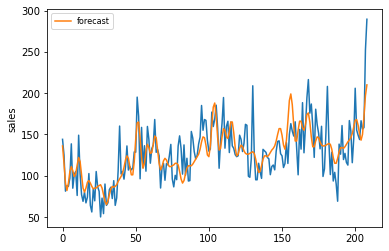

In [34]:
#daily_test_df['ds'] = pd.to_datetime(daily_test_df['ds'],format='%Y%m%d')
#daily_test_df['year'] = pd.DatetimeIndex(daily_test_df['ds']).year
fig, ax = plt.subplots()
ax.plot(daily_train_df["y"])#, label='training')
#ax.plot(daily_test_df["y"]#, label='actual')
ax.plot(daily_train_df['Predictions'], label='forecast')
#ax.set_title('Forecast vs Actuals')
#ax.set_xlabel('year')
#ax.set_xticklabels(df["year"], rotation=0)
ax.set_ylabel('sales')
legend = ax.legend(loc='upper left', fontsize=8)
#pyplot(fig)

In [35]:
daily_test_df

,ds,y,Predictions
209,2018-01-03,138.00,200
210,2018-01-10,132.00,176
211,2018-01-17,170.33,155
212,2018-01-24,107.01,151
213,2018-01-31,145.00,162
214,2018-02-07,134.23,175
215,2018-02-14,190.93,177
216,2018-02-21,161.40,170
217,2018-02-28,177.42,165
218,2018-03-07,166.63,171


In [35]:
final_df=pd.DataFrame(daily_test_df.tail(60))[["ds","y","Predictions"]]
final_df.reset_index(inplace=True)
final_df.columns=["ss","Date","Sales","Predictions"]
final_df["Lower"]=0.95*final_df["Predictions"]
final_df["Upper"]=1.05*final_df["Predictions"]
final_df["Daily_Accuracy"]=100-np.abs((final_df["Predictions"]-final_df["Sales"])*100/final_df["Sales"])
final_df["Daily_MAPE"]=np.abs((final_df["Predictions"]-final_df["Sales"])*100/final_df["Sales"])
final_df["Daily_MAE"]=np.abs((final_df["Predictions"]-final_df["Sales"]))
 

In [36]:
final_df

,ss,Date,Sales,Predictions,Lower,Upper,Daily_Accuracy,Daily_MAPE,Daily_MAE
0,209,2018-01-03,138.00,200,190.00,210.00,55.072464,44.927536,62.00
1,210,2018-01-10,132.00,176,167.20,184.80,66.666667,33.333333,44.00
2,211,2018-01-17,170.33,155,147.25,162.75,90.999824,9.000176,15.33
3,212,2018-01-24,107.01,151,143.45,158.55,58.891692,41.108308,43.99
4,213,2018-01-31,145.00,162,153.90,170.10,88.275862,11.724138,17.00
5,214,2018-02-07,134.23,175,166.25,183.75,69.626760,30.373240,40.77
6,215,2018-02-14,190.93,177,168.15,185.85,92.704132,7.295868,13.93
7,216,2018-02-21,161.40,170,161.50,178.50,94.671623,5.328377,8.60
8,217,2018-02-28,177.42,165,156.75,173.25,92.999662,7.000338,12.42
9,218,2018-03-07,166.63,171,162.45,179.55,97.377423,2.622577,4.37


In [37]:
mae=np.abs((final_df["Predictions"]-final_df["Sales"]))
mae=mae.mean()
round(mae, 3)

26.002

In [36]:
daily_predictions_df = m.predict(daily_test_df)
daily_df = m.predict(daily_train_df)

C:\anaconda\envs\ml1\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\anaconda\envs\ml1\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\anaconda\envs\ml1\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\anaconda\envs\ml1\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [41]:
daily_test_df.head()

,ds,y,Predictions
209,2018-01-03,138.00,200
210,2018-01-10,132.00,176
211,2018-01-17,170.33,155
212,2018-01-24,107.01,151
213,2018-01-31,145.00,162


<AxesSubplot:xlabel='ds'>

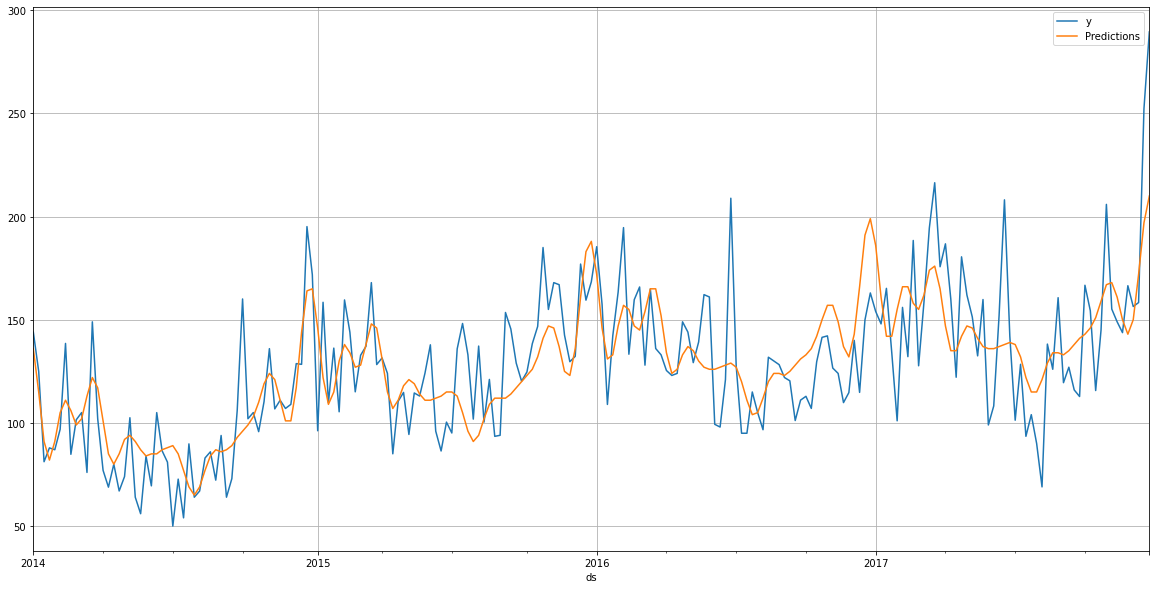

In [44]:
daily_train_df.plot(x='ds', y=['y', 'Predictions'], figsize=(20,10), grid=True)

In [ ]:
daily_test_df.plot(x='ds', y=['y', 'Predictions'], figsize=(20,10), grid=True)